# Intergalactic Medium Absortion

Neutral hydrogen in the intergalactic medium (IGM) attenuates the light from distant galaxies, even after reionisation.
synthesizer provides two analytic forms for this IGM absorption, ``Madau96`` and ``Inoue14``.
The ``Madau96`` model is based on [Madau et al. (1996)](https://ui.adsabs.harvard.edu/abs/1997ApJ...475..429M/abstract), and assumes a power-law relationship between the absorption and the redshift. 
The ``Inoue14`` model is based on [Inoue et al. (2014)](https://ui.adsabs.harvard.edu/abs/2014MNRAS.442.1805I/abstract), and includes the effects of the Lyman-$\alpha$ forest and Lyman--limit systems.

## Plotting the transmission curves

To simply visualize the transmission curves, we can simply instantiate the IGM class and call the `plot_transmission` method, passing our desired redshift and wavelength array (in Angstroms).

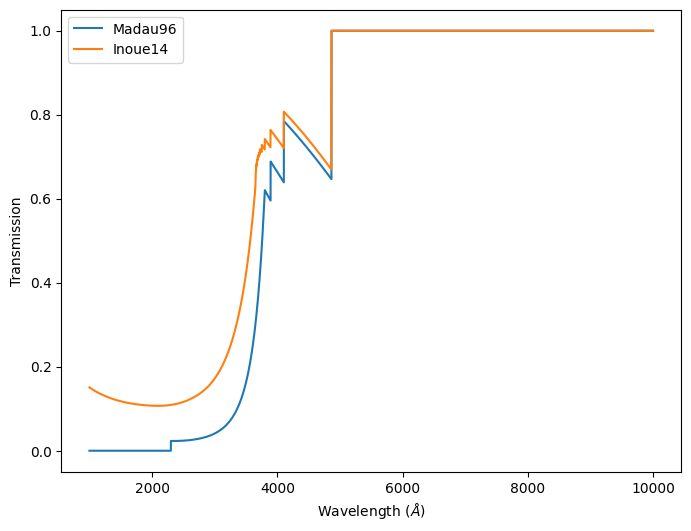

In [1]:
import numpy as np

from synthesizer.emission_models.attenuation.igm import Inoue14, Madau96

madau = Madau96()
inoue = Inoue14()

# Define redshift and wavelength range
redshift = 3.0
lams = np.logspace(3, 4, 10000)

fig, ax = madau.plot_transmission(redshift, lams)
_, _ = inoue.plot_transmission(redshift, lams, fig=fig, ax=ax, show=True)

Notice that we have passed the ``fig`` and ``ax`` to get both models on the same plot. This can be done with all of `synthesizer's` plotting methods. 

## Using the IGM models for attenuation

In reality most of the time you will not be working with the IGM models directly, but rather using them to attenuate your spectra. This is done automatically when a ``Sed`` (docs [here](../sed/sed.rst)) is converted to fluxes, all you need to do is pass the desired (uninstatiated) IGM model to ``get_fnu``. 

Below we will use the ``Madau96`` model to attenuate a spectrum extracted from a ``Grid`` (docs [here](../grids/grids.rst)).

In [2]:
from astropy.cosmology import Planck18 as cosmo

from synthesizer.grid import Grid

grid_dir = "../../../tests/test_grid/"
grid_name = "test_grid"
grid = Grid(grid_name, grid_dir=grid_dir)

log10age = 6.0  # log10(age/yr)
metallicity = 0.01
grid_point = grid.get_grid_point((log10age, metallicity))
sed = grid.get_spectra(grid_point, spectra_id="transmitted")
sed.lnu *= 1e8  # multiply initial stellar mass

# Compute the flux in the presence of IGM attenuation
sed.get_fnu(cosmo=cosmo, z=redshift, igm=Madau96)

unyt_array([0., 0., 0., ..., 0., 0., 0.], 'nJy')

Below we plot the spectra produced when assuming each of the models for IGM attenuation:

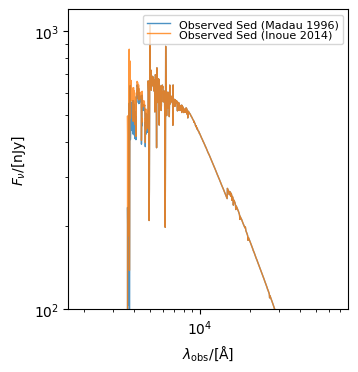

In [3]:
# Plot the intrinsic and observed SED
fig, ax = sed.plot_observed_spectra(
    show=False, label="Observed SED (Madau 1996)"
)
sed.get_fnu(cosmo=cosmo, z=redshift, igm=Inoue14)
_, _ = sed.plot_observed_spectra(
    fig=fig,
    ax=ax,
    show=True,
    label="Observed SED (Inoue 2014)",
    ylimits=(100, 1200),
)